# Demo notebook
This notebook demos method and functions I created to aid with the management and manipulation of the visual genome dataset. It also demos the graph classification methods that I performed to get the results for my project.

In [47]:
from tqdm import tqdm
import numpy as np

## Section 1 - Loading filtered visual geneome data:
 - loading and filtering visual genome scene graphs

In [6]:
from vg_data_utils import get_scene_graphs  

When you first run the <b><i>get_scene_graphs</i></b> function it will take a relatively long time to execute. This is due to it loading all of the scene graphs and then filtering them based on their contents. As there are over 100,000 scene graphs this takes up to a few minutes (depending on disk speed).

In [9]:
%%time
scene_graphs = get_scene_graphs(filters=['frisbee'])

  0%|          | 74/108077 [00:00<02:26, 736.44it/s]

Filters dont already exits. Filtering data


  6%|▋         | 109/1687 [00:00<00:01, 982.63it/s]

Writing filters to file at 'data//filtered/frisbee.txt')
Loading scene graphs from filtered ids


100%|██████████| 1687/1687 [00:01<00:00, 1342.83it/s]

CPU times: user 1min 47s, sys: 7.27 s, total: 1min 55s
Wall time: 2min 34s


Any time you call the <b><i>get_scene_graphs</i></b> function after the first execution, with the same filter value, it will load the scene graphs in a much faster time. This is becuase on the first function execution it generated a file that contains all of the ids of the scene graphs tha comply to the filters supplied. Therefore, on any further executions it can skip the filtering step and just load the scene graphs from the file created on the first execution.

In [10]:
with open("data/filtered/frisbee.txt") as file:
    for line in file:
        print(line)

61519 150325 150416 150515 285680 285819 285971 285979 286078 497913 497920 498108 498110 498214 498269 498297 713131 713238 713356 713427 713445 713450 713505 713567 713680 713846 1159744 1159885 1160004 1592071 1592486 1592505 1592640 1592648 1592732 1592975 1593067 1593185 1593208 2414938 2414624 2414202 2413856 2413592 2413504 2413475 2412687 2412545 2412519 2412390 2412264 2411775 2411621 2411557 2411399 2411371 2411364 2411352 2411298 2411219 2411155 2411100 2411072 2411060 2410972 2410925 2410923 2410917 2410849 2410840 2410817 2410766 2410714 2410534 2410508 2410475 2410378 2410372 2410228 2410183 2410008 2409964 2409958 2409737 2409544 2409448 2409304 2409286 2409107 2409068 2408619 2408630 2408633 2408634 2408635 2408651 2408686 2408743 2408921 2408963 2408998 2408562 2408499 2408486 2408476 2408370 2408356 2408331 2408053 2408043 2408005 2408002 2407990 2407987 2407919 2407915 2407904 2407846 2407805 2407781 2407753 2407734 2407636 2407633 2407609 2407596 2407317 2407311 240

In [8]:
%psource get_scene_graphs

In [11]:
%%time
scene_graphs = get_scene_graphs(filters=['frisbee'])

  0%|          | 0/1687 [00:00<?, ?it/s]

Filtered id already exist loadint from file at 'data//filtered/frisbee.txt'
Loading scene graphs from filtered ids


100%|██████████| 1687/1687 [00:01<00:00, 1223.92it/s]

CPU times: user 2 s, sys: 104 ms, total: 2.1 s
Wall time: 2.12 s


You can now see that the new scene graphs variable has been populated by a subset of the visual genome dataset. The size of this depends on how many objects are filtered for and the number of occurences of each object in the visual genome dataset.

In [13]:
len(scene_graphs)

1687

Each element that was loaded is currenlty stored as a <b><i>visual_genome.models.Graph</i></b> variable.

In [14]:
sample_graph = scene_graphs[10]
type(sample_graph)

visual_genome.models.Graph

The <b><i>visual_genome.models.Graph</i></b> variables store all the information about the objects in the images and how they interact with eachother.

In [15]:
print(f"Objects:\n{', '.join([str(s) for s in sample_graph.objects])}\n")
print(f"Relationships:\n{', '.join([str(s) for s in sample_graph.relationships])}\n")
print(f"Attributes:\n{', '.join([str(s) for s in sample_graph.attributes])}\n")

Objects:
jeans, man, chains, stand, back, car, grass, tree, parking lot, suv, large tree, disc golf, car, disc golf, car, disc golf, car, disc golf, car, game, man, frisbee golf, equipment, frisbee, goal, frisbee, goal, net, chains, disc, grass, man, car, bowl, tag, road, head, face, arm, arm, hand, wheels, plate

Relationships:
4249944: man wears jeans, 4249945: stand has chains, 4249946: car by disc golf, 4107343: car near disc golf, 4107345: car near disc golf, 4249947: frisbee IN goal, 4249948: frisbee reached goal, 4249949: chains create net, 4249950: man standing in grass, 4249951: car parked on road, 4249952: head OF man, 4249953: arm OF man, 4249954: hand OF man, 4249955: wheels ON car

Attributes:




Each object in the scene graph also contains a lot of information about it. Such as positional data and attributes.

In [16]:
print(f'name: {sample_graph.objects[0].names[0]}\nid: {sample_graph.objects[0].id}')
print('======================')
print(f'X: \t\t{sample_graph.objects[0].x}')
print(f'Y: \t\t{sample_graph.objects[0].y}')
print(f'Width: \t\t{sample_graph.objects[0].width}')
print(f'Height: \t{sample_graph.objects[0].height}')
print(f'Attributes: \t{sample_graph.objects[0].attributes}')
print(f'Names: \t\t{sample_graph.objects[0].names}')
print(f'Synsets: \t{sample_graph.objects[0].synsets}')

name: jeans
id: 1572099
X: 		335
Y: 		128
Width: 		31
Height: 	71
Attributes: 	[]
Names: 		['jeans']
Synsets: 	['jean.n.01']


## Section 2 - Converting scene graphs to networkx graphs

In [17]:
from sg_to_nx_graph import sg_to_nx
from render_graph import render_graph
from IPython.display import Image
import matplotlib.pyplot as plt
import networkx as nx
plt.rcParams["figure.figsize"] = (10,10)

You can take a scene graph and pass it my function <b><i>sg_to_nx</i></b> and it will return a networkx graph. You can define a format of the netowrkx graphs by using the other parametes that are available in the function.

In [22]:
test_graph = sg_to_nx(sample_graph) 
print(nx.info(test_graph))

Name: 
Type: DiGraph
Number of nodes: 43
Number of edges: 14
Average in degree:   0.3256
Average out degree:   0.3256


https://cs.stanford.edu/people/rak248/VG_100K/497920.jpg


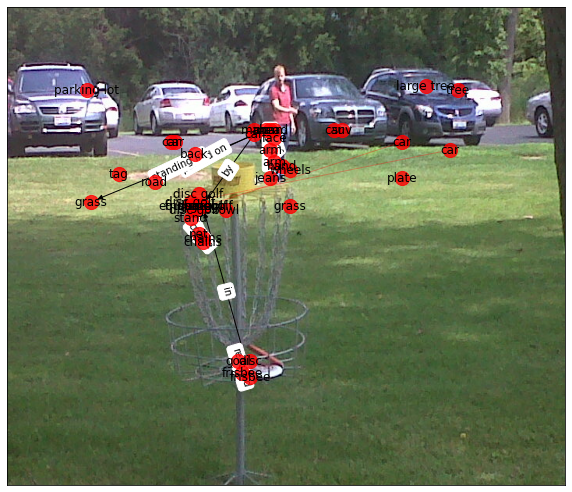

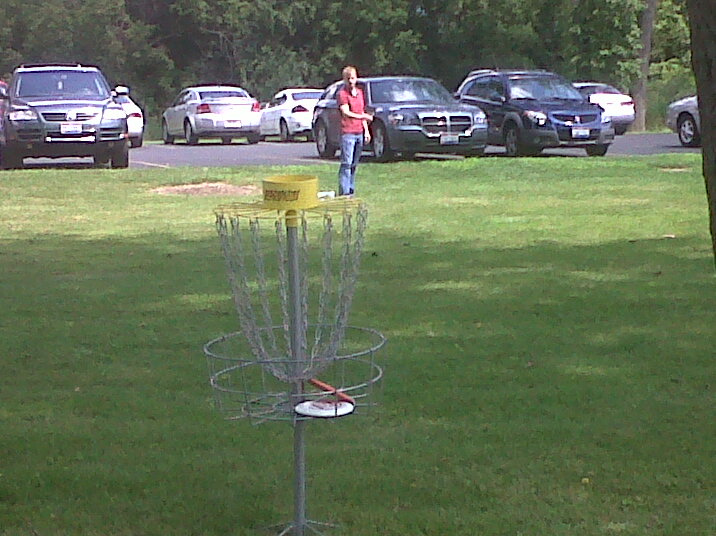

In [23]:
render_graph(test_graph,axis=100,grid=False)
Image("https://cs.stanford.edu/people/rak248/VG_100K/497920.jpg",width=500,height=500)

You can customise the format of the data in the networkx graphs by passing different parameters to the <b><i>sg_to_nx</i></b> function. For example you can solve for a minimum spanning tree on the graph to make sure that it is a connected graph:

In [24]:
test_graph = sg_to_nx(sample_graph, mst=True, near=0, weighted=True, distance=100) 
print(nx.info(test_graph))

Name: 
Type: DiGraph
Number of nodes: 43
Number of edges: 96
Average in degree:   2.2326
Average out degree:   2.2326


https://cs.stanford.edu/people/rak248/VG_100K/497920.jpg


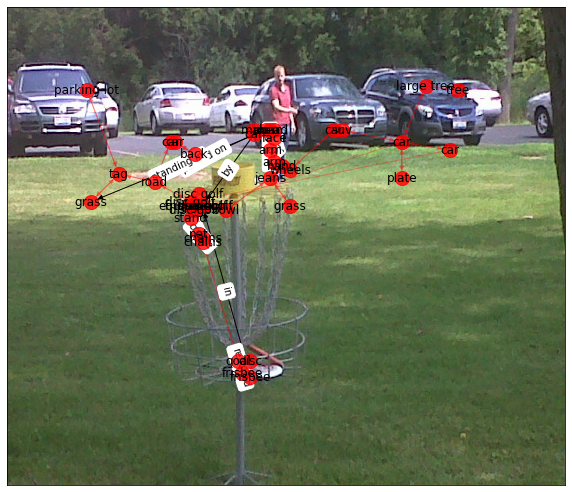

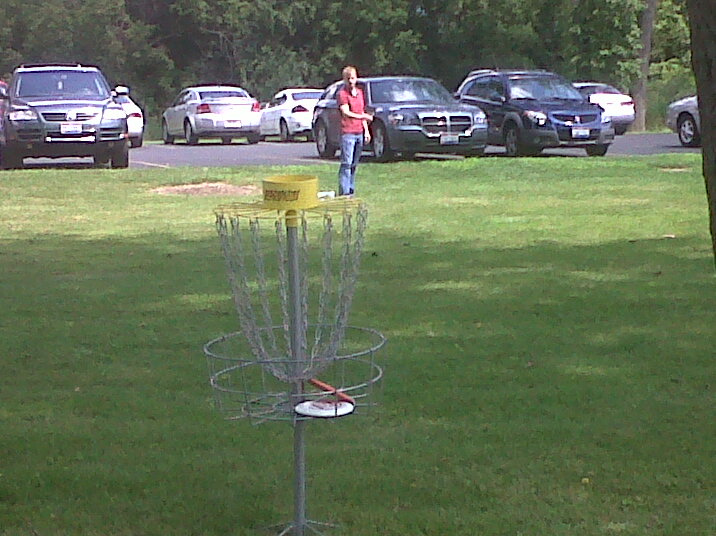

In [25]:
render_graph(test_graph,axis=100,grid=False)
Image("https://cs.stanford.edu/people/rak248/VG_100K/497920.jpg",width=500,height=500)

You can then convert all of the scene graphs to networkx graphs using this method. 

In [27]:
from tqdm import tqdm
graphs = []
for sg in tqdm(scene_graphs):
    g = sg_to_nx(sg, mst=True, near=0, weighted=True, distance=100) 
    graphs.append(g)

100%|██████████| 1687/1687 [00:15<00:00, 109.19it/s]


In [28]:
len(graphs)

1687

In [29]:
type(graphs[0])

networkx.classes.digraph.DiGraph

In [ ]:
print(nx.info(graphs[0]))

I used this method to generate 24 datasets in my paper. Each dataset created had a different representation of graphs. I was researching which format would be the most accurate when applied to classification problems.

## Section 3 - Creating ground truth data using an virtual user (oracle)

To demo the generation of ground truth data I have created a demo oracle that likes images if they contain a dog that has a relationship to a frisbee.

In [30]:
def test_oracle(G):
    nodes = G.nodes(data=True)
    dogs = [id for id, data in nodes if data["label"] in ["dog"]]
    frisbees = [id for id, data in nodes if data["label"] in ["frisbee"]]
    if len(dogs) > 0 and len(frisbees) > 0:
        for d in dogs:
            for f in frisbees:
                if G.has_edge(d,f) or G.has_edge(f,d):
                    return 1
    return 0

This oracle returns 1 if it likes an image or 0 if it dislikes an image.

In [31]:
test_oracle(graphs[0])

0

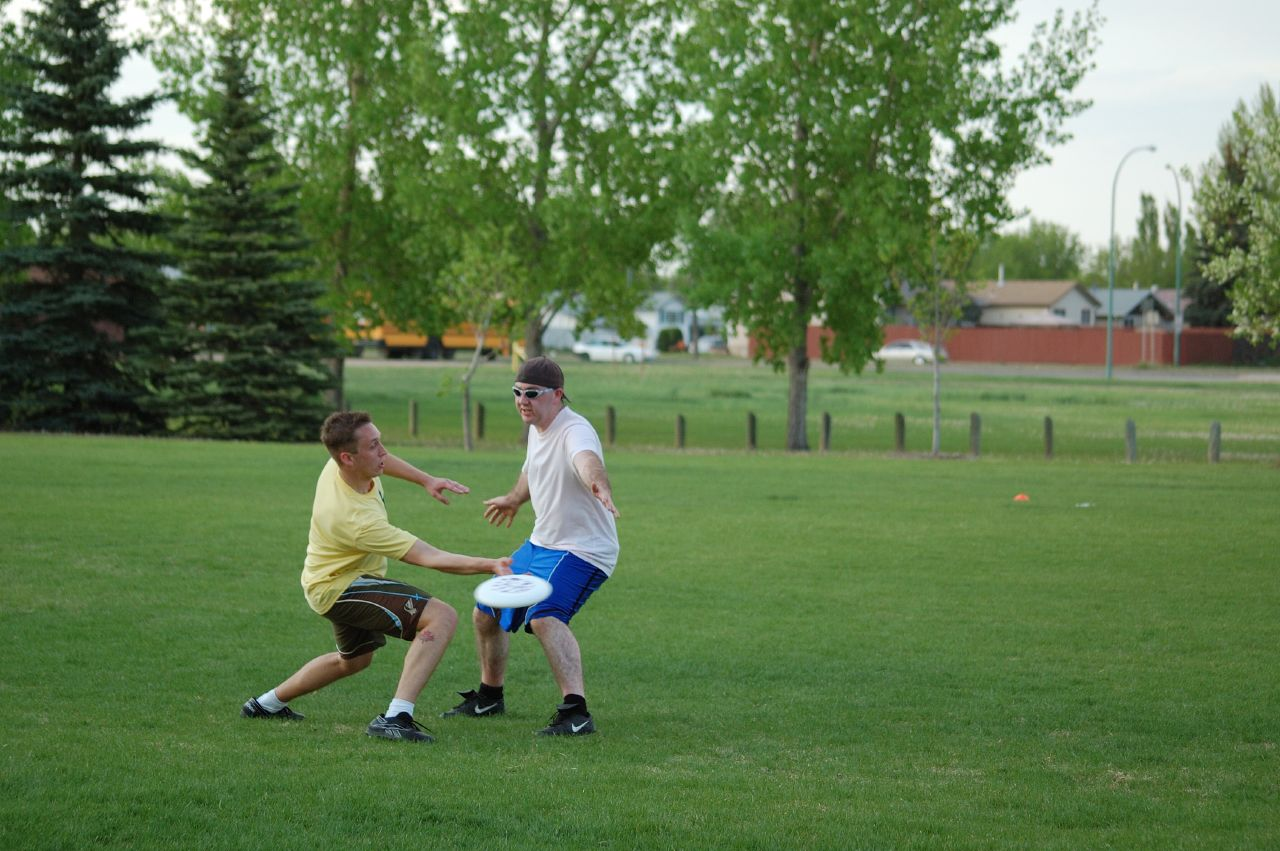

In [32]:
Image(graphs[0].graph['url'])

In [33]:
test_oracle(graphs[9])

1

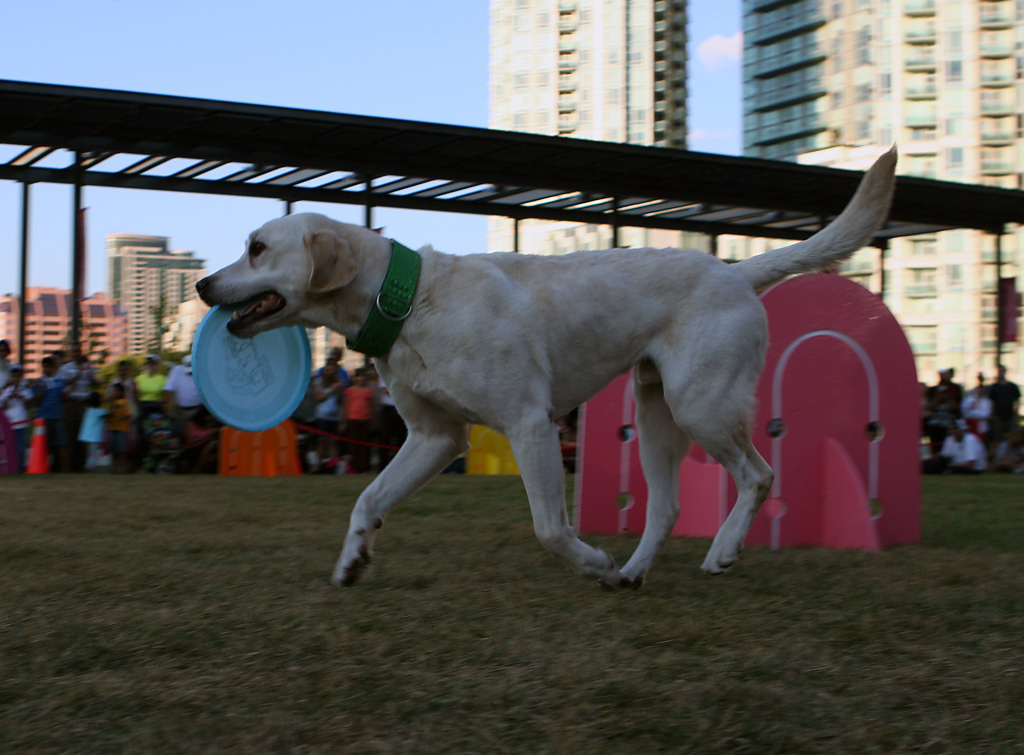

In [34]:
Image(graphs[9].graph['url'])

You can then apply this oracle function to all of the networkx graphs to generate a ground truth dataset for all of the images in the dataset. 

In [35]:
y = []
for g in tqdm(graphs):
    y.append(test_oracle(g))

100%|██████████| 1687/1687 [00:00<00:00, 34649.75it/s]


In [36]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 

In [37]:
len(y)

1687

You can then see a breakdown of how many images in the dataset the oracle 'liked' and 'disliked'.

In [38]:
from collections import Counter
Counter(y)

Counter({0: 1420, 1: 267})

(array([1420.,  267.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

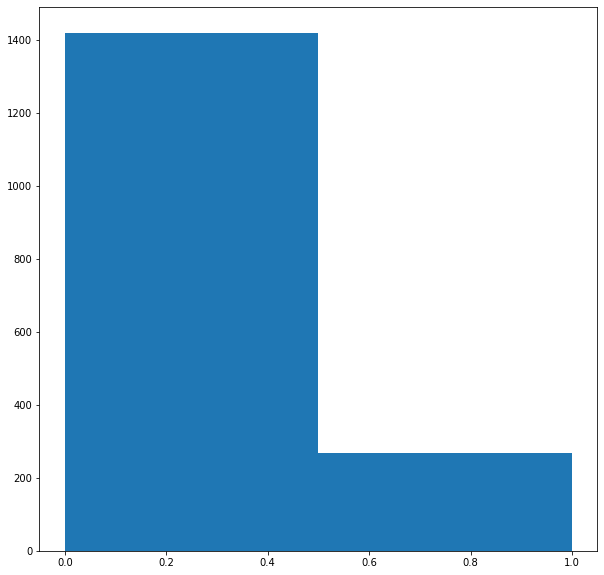

In [39]:
plt.hist(y, 2)

## Section 4 - Training classifiers on collection of networkx graphs and ground truth created by oracle.

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from eden.graph import vectorize

First I needed to convert the networkx graphs to vectors so that they can be used with classification functions. For this I used the vectorize function from the EDeN library.

In [41]:
X = vectorize(graphs,complexity=3)

This creates a collection of sparse vectors.

In [42]:
print(X[0])

  (0, 492)	0.08097763301789158
  (0, 4250)	0.24293289905367477
  (0, 6200)	0.04048881650894579
  (0, 7082)	0.32391053207156634
  (0, 7530)	0.08097763301789158
  (0, 8463)	0.04048881650894579
  (0, 10887)	0.12146644952683738
  (0, 11756)	0.16195526603578317
  (0, 12002)	0.08097763301789158
  (0, 13240)	0.04048881650894579
  (0, 13994)	0.08097763301789158
  (0, 14762)	0.32391053207156634
  (0, 15917)	0.04048881650894579
  (0, 17640)	0.04048881650894579
  (0, 20842)	0.04048881650894579
  (0, 21625)	0.08097763301789158
  (0, 21931)	0.04048881650894579
  (0, 23850)	0.16195526603578317
  (0, 24253)	0.04048881650894579
  (0, 27188)	0.24293289905367477
  (0, 27265)	0.04048881650894579
  (0, 30778)	0.08097763301789158
  (0, 31362)	0.08097763301789158
  (0, 38754)	0.08097763301789158
  (0, 40889)	0.16195526603578317
  (0, 41865)	0.04048881650894579
  (0, 44884)	0.04048881650894579
  (0, 49578)	0.08097763301789158
  (0, 49922)	0.08097763301789158
  (0, 51700)	0.08097763301789158
  (0, 52676)	0.32

In [43]:
X.shape

(1687, 65537)

Once the graph data has been embedded into vectors I then trained a classifier on the vectors and the ground truth data generated by the oracle.

In [44]:
predictor = SGDClassifier(average=True, class_weight="balanced", shuffle=True, n_jobs=-1)

I then calculte a classification score using cross validation with 10 folds and a scoring metrix of area under roc curve.

In [45]:
scores = cross_val_score(predictor, X, y, cv=10, scoring="roc_auc")

In [48]:
print(f'Scores:\n{scores}\n')
print("AUC ROC: %.4f +- %.4f" % (np.mean(scores), np.std(scores)))

Scores:
[0.96322379 0.98513302 0.9913928  0.98435055 0.98461137 0.94314032
 0.98695879 0.98916576 0.96397616 0.97156013]

AUC ROC: 0.9764 +- 0.0147


To be able to analyse the classifier further I fit the classifier to 10% of the data and then computed a balanced accuracy score and a confusion martix when predicting on the testing set (the remaining 90% of the data).

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.1, random_state=42
)
predictor.fit(X_train, y_train)

SGDClassifier(average=True, class_weight='balanced', n_jobs=-1)

In [50]:
pred = predictor.predict(X_test)
print(balanced_accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.8568474666217957
[[1228   49]
 [  60  182]]


https://cs.stanford.edu/people/rak248/VG_100K/497913.jpg


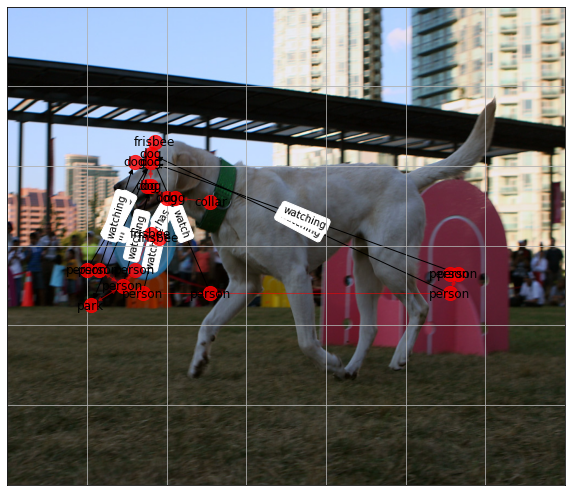

https://cs.stanford.edu/people/rak248/VG_100K/713680.jpg


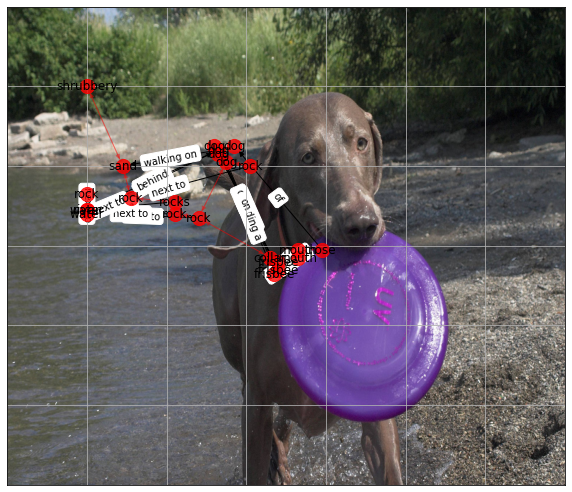

https://cs.stanford.edu/people/rak248/VG_100K/1592732.jpg


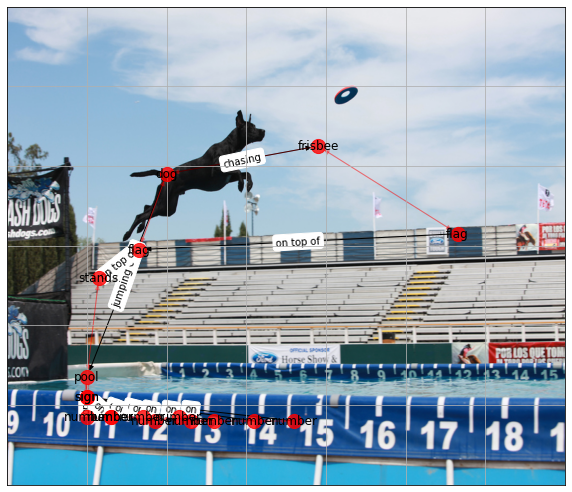

https://cs.stanford.edu/people/rak248/VG_100K/1592975.jpg


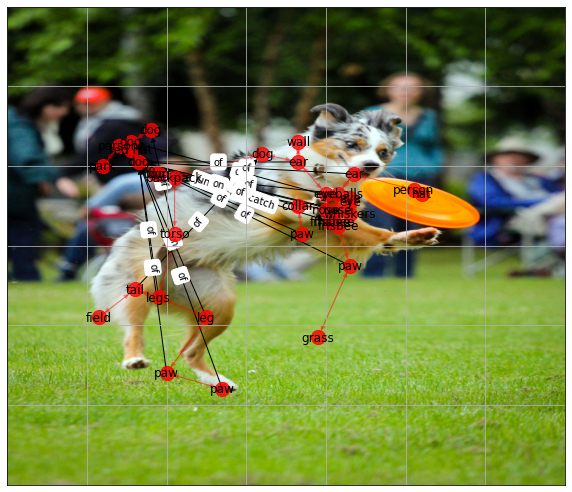

https://cs.stanford.edu/people/rak248/VG_100K_2/2412519.jpg


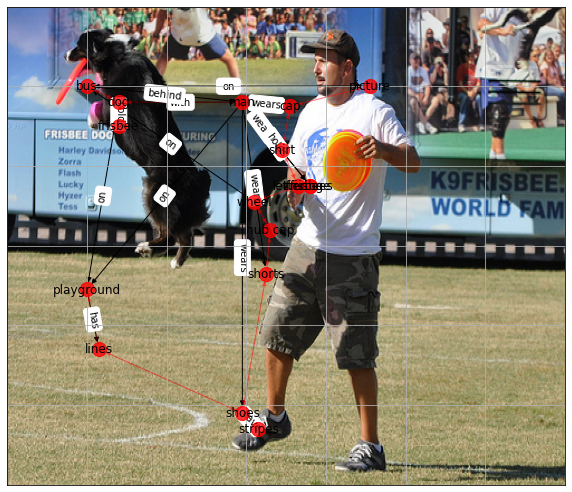

In [51]:
count = 0
for x in range(X.shape[0]):
    if count >= 5:
        break
    pred = predictor.predict(X[x])
    if pred == 1:
        render_graph(graphs[x])
        count += 1